
# Fundamentos de Aprendizado Profundo
Com Exemplos em Pytorch

--------------------------------------------------------------------------------

autor: Wedeueis Braz email: wedeueisbraz@gmail.com


Nota

Esse material foi criado como parte do curso de Deep Learning & PyTorch do HackerSpace com fim apenas didático. Não existe garantia da aplicação, nem será dado suporte, para outros fins.


In [2]:
import torch
import numpy as np

A estrutura fundamental do Pytorch é o **Tensor**.

Um Tensor é essencialmente um Array, ou seja um estrutura de dados multidimensional organizada como uma grade usada para armazenar os dados e parâmetros dos modelos.

In [3]:
# Criando tensores

# a partir de listas
array = [[1, 2, 3], [4, 5, 6]]
tensor = torch.tensor(array)
print(tensor)

# a partir de nunmpy arrays
np_array = np.array(array)
tensor2 = torch.tensor(np_array)
print(tensor2)


tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


In [4]:
# atributos

# dimensões do tensor
print(tensor.shape)

# tipo do dado armazenado
print(tensor.dtype)

# onde o tensor esta armazendao
print(tensor.device)

torch.Size([2, 3])
torch.int64
cpu


In [5]:
# Operações

print( "Original: ", tensor )

# Adição (as dimensões devem ser compatíveis)

print( "soma: ", tensor + tensor)

# Multiplicação elmento a elemento
print( "multiplicação elemento a elemento: ", tensor * tensor)

# Transposição matricial (tensor com 2 dimensoes)
print("Tranposta: ", tensor.T)

# Multiplicação matricial
print( "Multiplicação Matricial: ", tensor @ tensor.T)

Original:  tensor([[1, 2, 3],
        [4, 5, 6]])
soma:  tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
multiplicação elemento a elemento:  tensor([[ 1,  4,  9],
        [16, 25, 36]])
Tranposta:  tensor([[1, 4],
        [2, 5],
        [3, 6]])
Multiplicação Matricial:  tensor([[14, 32],
        [32, 77]])


## Criando Redes Neurais

In [6]:
import torch.nn as nn

In [7]:
# Exemplo de tensor com 3 features

input_tensor = torch.tensor([
    [0.3471, 0.4547, -0.2356]
])

print(input_tensor)

tensor([[ 0.3471,  0.4547, -0.2356]])


In [8]:
# Definindo uma camada Linear

linear_layer = nn.Linear(in_features = 3, out_features = 2)

In [9]:
## Passando o input através da camada linear

output = linear_layer(input_tensor)
print(output)

tensor([[-0.1568,  0.8149]], grad_fn=<AddmmBackward0>)


In [10]:
## Atributos da camada Linear
print(linear_layer.weight)

print(linear_layer.bias)


Parameter containing:
tensor([[ 0.3221,  0.2587,  0.0622],
        [ 0.2664,  0.5039, -0.0425]], requires_grad=True)
Parameter containing:
tensor([-0.3716,  0.4833], requires_grad=True)


In [11]:
# Criando um modelo de multiplas camadas sequenciais

model = nn.Sequential(
    nn.Linear(10, 18),
    nn.Linear(18, 20),
    nn.Linear(20, 5)
)

In [12]:
input_tensor = torch.rand(1, 10)

output_tensor = model(input_tensor)
print(output_tensor)

tensor([[ 0.1262, -0.2085,  0.0300,  0.0034, -0.1480]],
       grad_fn=<AddmmBackward0>)


In [13]:
# Funções de Ativação

input_tensor = torch.tensor([[6.0]])
sigmoid = nn.Sigmoid()
output = sigmoid(input_tensor)
print(output)

tensor([[0.9975]])


In [14]:
# Exemplo de modelo de classificação Binária

model = nn.Sequential(
    nn.Linear(10, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

input_tensor = torch.rand(1, 10)
print(model(input_tensor))

tensor([[0.5593]], grad_fn=<SigmoidBackward0>)


In [15]:
# Exemplo de modelo de classificação Multiclasse
model = nn.Sequential(
    nn.Linear(3, 4),
    nn.Linear(4, 3),
    nn.Softmax(dim=-1)
)

input_tensor = torch.rand(1, 3)
print(model(input_tensor))

tensor([[0.2996, 0.2842, 0.4162]], grad_fn=<SoftmaxBackward0>)


## Treinando Redes Neurais

In [16]:
input_data = torch.rand(5, 6)
print(input_data)

# Modelo de Classificação Binaria

model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

output = model(input_data)
print(output)

# Modelo de Classificação Multiclasse
n_classes = 3

model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, n_classes),
    nn.Softmax(dim=-1)
)

output = model(input_data)
print(output)

# Modelo de Regressão

model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1),
)

output = model(input_data)
print(output)

tensor([[0.9202, 0.7049, 0.5418, 0.0780, 0.8689, 0.8626],
        [0.8416, 0.1440, 0.9306, 0.1703, 0.7465, 0.9849],
        [0.1313, 0.2874, 0.9583, 0.7294, 0.1179, 0.3344],
        [0.6323, 0.4103, 0.9362, 0.3010, 0.5783, 0.6970],
        [0.1091, 0.7400, 0.2742, 0.3854, 0.6101, 0.7723]])
tensor([[0.4334],
        [0.5048],
        [0.4643],
        [0.4683],
        [0.4166]], grad_fn=<SigmoidBackward0>)
tensor([[0.3186, 0.3537, 0.3277],
        [0.3272, 0.3516, 0.3212],
        [0.3827, 0.3317, 0.2856],
        [0.3539, 0.3371, 0.3091],
        [0.3153, 0.3804, 0.3043]], grad_fn=<SoftmaxBackward0>)
tensor([[0.4511],
        [0.4813],
        [0.3949],
        [0.4509],
        [0.4517]], grad_fn=<AddmmBackward0>)


In [17]:
# One Hot Encoding

import torch.nn.functional as F

F.one_hot(torch.tensor(0), num_classes=3)

tensor([1, 0, 0])

In [18]:
# Loss Function para Classificação

from torch.nn import CrossEntropyLoss

input_data = torch.rand(1, 6)
one_hot_target = torch.tensor([[1, 0]])

model = nn.Sequential(
    nn.Linear(6, 8),
    nn.Linear(8, 4),
    nn.Linear(4, 2)
)

scores = model(input_data)

criterion = CrossEntropyLoss()
loss = criterion(scores.double(), one_hot_target.double())

loss.backward()

In [19]:
# Gradientes calculados
model[0].weight.grad

tensor([[-0.0647, -0.1699, -0.0440, -0.0956, -0.1464, -0.1337],
        [ 0.0178,  0.0468,  0.0121,  0.0263,  0.0403,  0.0368],
        [-0.0193, -0.0508, -0.0132, -0.0286, -0.0437, -0.0400],
        [-0.0208, -0.0546, -0.0142, -0.0307, -0.0470, -0.0430],
        [ 0.0339,  0.0891,  0.0231,  0.0501,  0.0767,  0.0701],
        [-0.0089, -0.0233, -0.0060, -0.0131, -0.0201, -0.0184],
        [ 0.0438,  0.1150,  0.0298,  0.0646,  0.0990,  0.0904],
        [ 0.0364,  0.0955,  0.0247,  0.0537,  0.0822,  0.0751]])

In [20]:
# Atualizando os pesos manualmente
# Taxa de aprendizado
lr = 0.001

# Atualização de pesos
weight = model[0].weight
weight_grad = model[0].weight.grad
weight = weight - lr * weight_grad

# Atualizando o Bias
bias = model[0].bias
bias_grad = model[0].bias.grad
bias = bias - lr * bias_grad

In [21]:
# Atualizando os pesos automaticmaente com otimizadores

import torch.optim as optim

# Criar o otiimzador
optimizer = optim.SGD(model.parameters(), lr=0.001)
optimizer.step()

In [22]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.nn import MSELoss

# Training Loop

# Criar um modelo
# Escolher uma Loss Function
# Criar um dataset
# Definir um otimizador
# Gerar um "Training Loop"
    # Calcular a loss (foward pass)
    # Calcular os gradientes locais
    # Atualizar parametros do modelo

data = torch.tensor([
    [0, 0, 0.5, 1, 0.036],
    [1, 0, 1.0, 2, 0.133],
    [2, 0, 0.0, 1, 0.234],
    [1, 0, 1.0, 0, 0.076],
    [2, 0, 1.0, 1, 0.170]
  ]
)

features = data[:, :-1]
target = data[:, -1:]

dataset = TensorDataset(torch.tensor(features).float(), torch.tensor(target).float())
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

model =  nn.Sequential(
    nn.Linear(4, 2),
    nn.Linear(2, 1)
)

criterion = MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

# Training Loop
num_epochs = 4

for epoch in range(num_epochs):
  for data in dataloader:
    # Resetar os gradientes
    optimizer.zero_grad()
    # Pegue a feature e o target do dataloader
    feature, target = data
    # Realize o foward pass
    pred = model(feature)
    # Calcule a loss e gradientes
    loss = criterion(pred, target)
    loss.backward()
    # Atualize os parametros
    optimizer.step()



C:\Users\fsimiao\AppData\Local\Temp\ipykernel_21364\2902768947.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = TensorDataset(torch.tensor(features).float(), torch.tensor(target).float())


## Arquitetura e Hiperparametros

In [23]:
# Calculando a Capacidade do modelo
total = 0
for parameter in model.parameters():
  total += parameter.numel()

print(total)

13


In [24]:
# Transfer Learning

# Você pode salvar os pesos de modelo ou camada e depois carrega-los novamente, assim é possivel retreinar o modelo de onde parou
# Você pode escolher também congelar algumas camadas e assim evitar que sejam atualizadas,
# geralmente as camadas mais inferiores são congeladas em processos de tranferencia de aprendizado

torch.save(model, "path")
model = torch.load("path")

for name, param in model.named_parameters():
  if name == '0.weight':
    param.requires_grad = False

## Model Evaluation

In [25]:
import pandas as pd

C:\Users\fsimiao\AppData\Local\Temp\ipykernel_21364\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [27]:
data = pd.read_csv('student_prediction.csv')

In [28]:
data

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [29]:
features = data.iloc[:, 1:-1]
target = data.iloc[:, -1:]

In [30]:
X = np.array(features).astype(np.float64)
y = np.array(target).astype(np.float64)

n_features = X.shape[1]
output_size = 1

In [31]:
dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float())

In [32]:
sample = dataset[0]
input_sample, label_sample = sample
print('input sample: ', input_sample)
print('label sample: ', label_sample)

input sample:  tensor([2., 2., 3., 3., 1., 2., 2., 1., 1., 1., 1., 2., 3., 1., 2., 5., 3., 2.,
        2., 1., 1., 1., 1., 1., 3., 2., 1., 2., 1., 1., 1.])
label sample:  tensor([1.])


In [33]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader

batch_size = 32

# Split the dataset into train, validate, and test sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

# Create the dataloaders
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [34]:
model =  nn.Sequential(
    nn.Linear(n_features, 10),
    nn.Linear(10, 5),
    nn.Linear(5, output_size)
)

criterion = MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

# Training Loop
num_epochs = 100
epoch_train_loss = []
epoch_val_loss = []
for epoch in range(num_epochs):

  # Training Loop
  training_loss = 0.0
  for i, data in enumerate(train_loader):
    # Resetar os gradientes
    optimizer.zero_grad()
    # Pegue a feature e o target do dataloader
    feature, target = data
    # Realize o foward pass
    pred = model(feature)
    # Calcule a loss e gradientes
    loss = criterion(pred, target)
    loss.backward()
    training_loss += loss.item()

    # Atualize os parametros
    optimizer.step()
  epoch_train_loss.append(training_loss / len(train_loader))

  # Validation Loop
  validation_loss = 0.0
  model.eval() #mude para o modo de avaliação
  with torch.no_grad(): #desliga a atualização de parametros
    for i, data in enumerate(val_loader):
      feature, target = data
      # Realize o foward pass
      pred = model(feature)
      # Calcule a loss e gradientes
      loss = criterion(pred, target)
      validation_loss += loss.item()
  epoch_val_loss.append(validation_loss/len(val_loader))
  model.train()

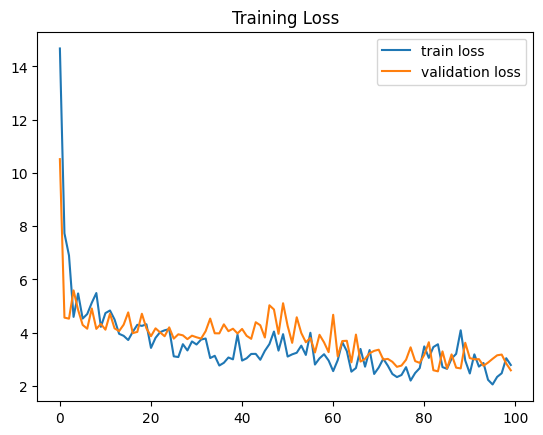

In [35]:
import matplotlib.pyplot as plt

plt.plot(epoch_train_loss)
plt.plot(epoch_val_loss)
plt.title("Training Loss")
plt.legend(["train loss", "validation loss"])

In [36]:
 # Test Loop
test_loss = 0.0

model.eval()
with torch.no_grad():
  for i, data in enumerate(test_loader):
    # Pegue a feature e o target do dataloader
    feature, target = data
    # Realize o foward pass
    pred = model(feature)
    # Calcule a loss e gradientes
    loss = criterion(pred, target)
    test_loss += loss.item()

    # Atualize os parametros
    optimizer.step()

avg_test_loss = test_loss / len(test_loader)
print(avg_test_loss)

4.553946018218994
